# Object / text detection module

## Object detection with YOLOv2

### (Optional) Creation of the official darknet YOLOv2 pretrained model

`darknet` is the original author of YOLOv2 architecture, and has released several weights on this website : https://pjreddie.com/darknet/yolov2/. You can download some of them as initialization to use / fine-tuning !

The default version takes a 416x416 input image, so make sure to take the right weights, or adapt the model architecture to support the one you want. You can find links to weights for `COCO` and `Pascal VOC` pretrained models in the `README` file. Download weights and put them in the current directory. The `from_darknet_pretrained` method automatically downloads the weights for the `COCO` pretrained model if the `weight_path` (1st argument) endswith `yolov2.weights` ! So you can simply execute the below cell and it will download + build the model.

Note : The `Pascal VOC` pretrained model seems to not work properly. However it is not an issue, as the `COCO` pretrained is trained on 80 classes which contains the 20 from `VOC`. You can simply use the `COCO` pretrained !

In [2]:
from models.detection.yolo import YOLO, COCO_CONFIG, VOC_CONFIG

coco_model = YOLO.from_darknet_pretrained('yolov2.weights', name = 'yolo_coco', ** COCO_CONFIG)
print(coco_model)
#voc_model  = YOLO.build_from_darknet('yolov2-voc.weights', nom = 'yolo_voc', ** VOC_CONFIG)

Save `model` to pretrained_models/yolo_coco/saving/ckpt-0003.keras

========== yolo_coco ==========
Model instance `model`
- Inputs 	: (None, 416, 416, 3)
- Outputs 	: (None, 13, 13, 5, 85)
- Number of layers 	: 76
- Number of parameters 	: 50.984 Millions
- Model not compiled yet

Transfer-learning from : yolov2.weights
Already trained on 0 epochs (0 steps)

- Image size : (416, 416, 3)
- Normalization schema : None
- Labels (n = 80) : ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', ...]
- Feature extractor : FullYolo



### Object detection

The `detect` function takes any kind of supported image formats (gif, png or jpg), or even video formats, and detects objects on each provided image(s) ! Multiple configurations can be provided to save results, extract / show individual boxes, ... Check the `YOLO.predict` method for a complete overview ;)

The streaming API achieves between 35 fps when using the `JAX` backend on my `RTX3080 Max-Q laptop GPU`, which is quite funny and impressive !

The `obj_threshold` argument represents the minimal score required to detect the object. The lower it is, the more object you will detect but with more mistakes (aka *false positives*).

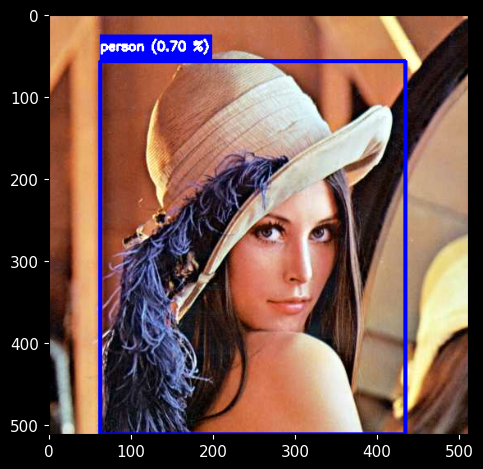

Infos keys : ('image', 'boxes', 'timestamp', 'filename', 'detected')


In [3]:
from models.detection import detect

filename, detected, infos = detect('lena.jpg', save = False, model = 'yolo_coco', obj_threshold = 0.5, color = 'b')[0]
print('Infos keys : {}'.format(tuple(infos.keys())))

In [ ]:
from models.detection import stream

stream(model = 'yolo_coco', max_time = 15)

### Test pretrained YOLOv2 model on its dataset

For this test, you need the `COCO` / `VOC` dataset installed. It is just an example, you do not have to reproduce it ;)

Note : the `VOC` dataset is used because it is faster to load and contains a subset of `COCO`'s classes.

Loading dataset voc...
Timers for logger timer :
- dataset loading : 3.212 sec
  - VOC loading : 3.212 sec
8 boxes found :
0.5385 0.0470 0.1387 0.1395 4 0.7897
0.5897 0.1842 0.1624 0.1178 4 0.7973
0.4181 0.2762 0.1756 0.1459 4 0.8364
0.6649 0.2770 0.1876 0.1480 4 0.7018
0.4827 0.4127 0.1864 0.1247 4 0.8295
0.5025 0.5572 0.1939 0.1405 4 0.7283
0.3166 0.6575 0.1944 0.1650 4 0.8522
0.3474 0.8070 0.1939 0.1482 4 0.8070


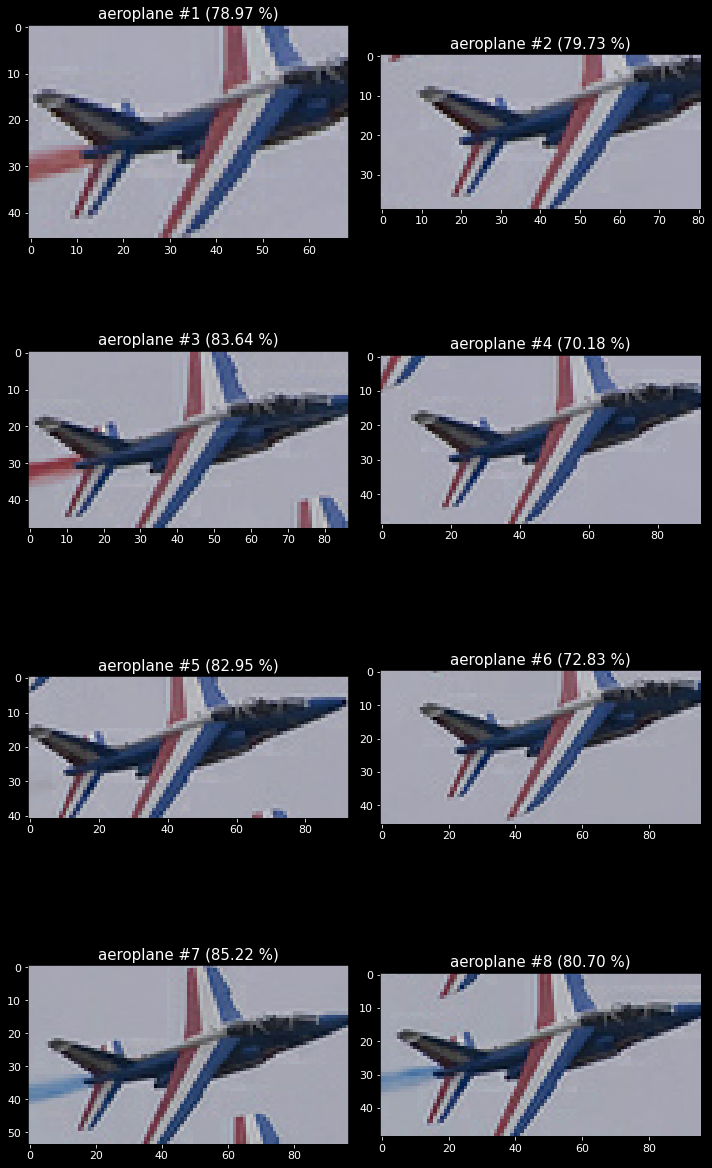

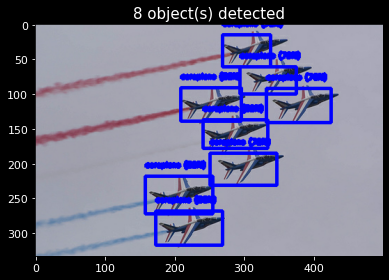

1 boxes found :
0.1069 0.2296 0.8217 0.3809 8 0.7859


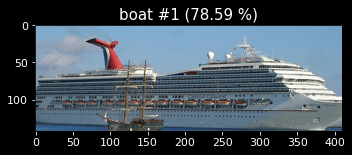

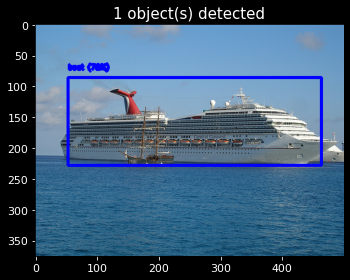

4 boxes found :
0.4224 0.0583 0.2229 0.7348 0 0.6359
0.1213 0.5919 0.0228 0.1351 27 0.5628
0.0157 0.4271 0.2179 0.4519 0 0.6876
0.1329 0.2906 0.7364 0.7075 17 0.6298


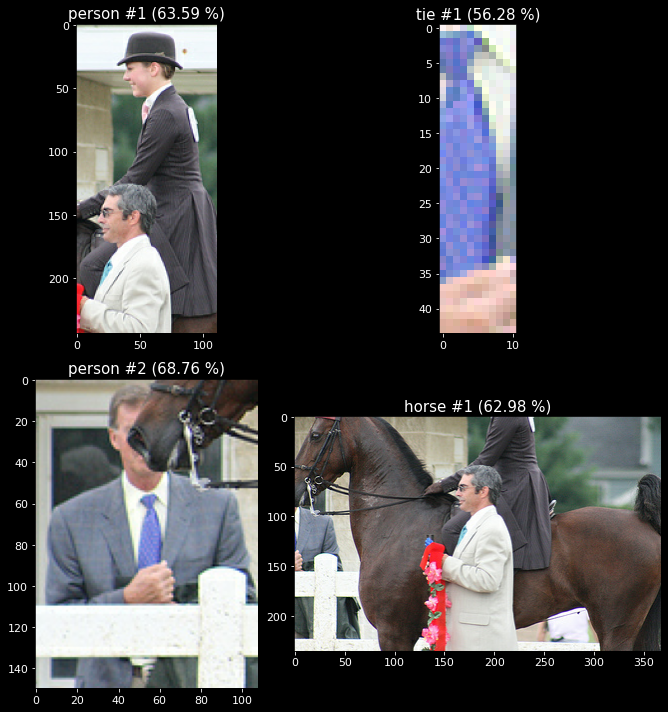

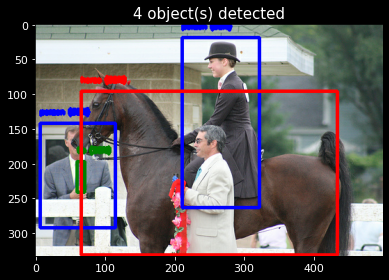

2 boxes found :
0.1005 0.3532 0.4531 0.6366 13 0.5154
0.4580 0.4902 0.2204 0.4870 0 0.7446


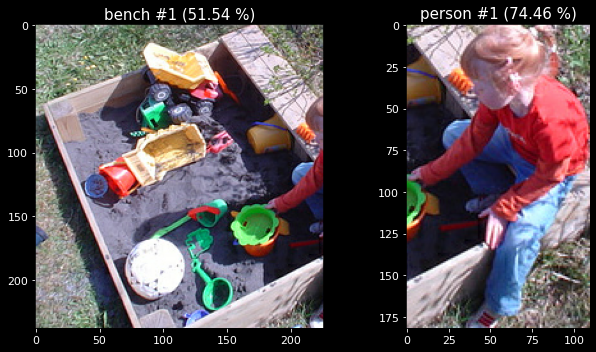

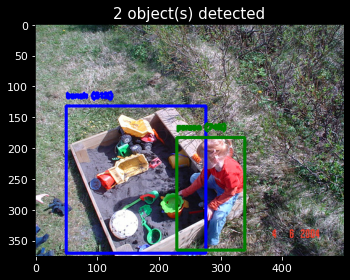

2 boxes found :
0.2541 0.1250 0.0989 0.2952 0 0.4985
0.1821 0.1453 0.1867 0.7561 0 0.7844


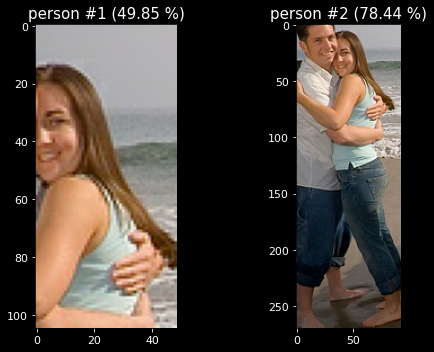

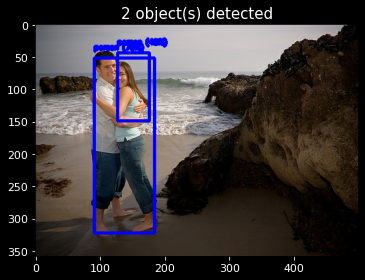

Timers for logger timer :
- predict : 4.224 sec
  - initialization : 0 μs
  - pre-processing : 0 μs
  - post_process executed 2 times : 3.878 sec (1.939 sec / exec)
    - show_result executed 5 times : 3.878 sec (775 ms / exec)
      - load_image executed 5 times : 12 ms (2 ms / exec)
  - batch processing : 61 ms
    - load_image executed 10 times : 60 ms (6 ms / exec)
  - inference : 285 ms
    - output decoding : 281 ms
      - output decoding executed 5 times : 280 ms (56 ms / exec)
        - init executed 5 times : 262 ms (52 ms / exec)
        - preprocess executed 5 times : 0 μs (0 μs / exec)
        - box filtering executed 5 times : 0 μs (0 μs / exec)
        - NMS executed 5 times : 18 ms (3 ms / exec)
  - post processing executed 5 times : 0 μs (0 μs / exec)
    - drawing boxes executed 5 times : 0 μs (0 μs / exec)
      - drawing executed 5 times : 0 μs (0 μs / exec)


In [7]:
from datasets import get_dataset
from models.detection import detect

#coco = get_dataset('coco')
voc = get_dataset('voc')

_ = detect(voc.sample(5, random_state = 0), model = 'yolo_coco', save = False, verbose = 3)

## Text detection with EAST

The weights for EAST are not automatically downloaded : they are accessible via [this open-source project](https://github.com/SakuraRiven/EAST). To perform the weights transfer to the `keras` implementation, you have to put the `east_vgg16.pth` file in the `pretrained_models/pretrained_weights` folder, and have a working `pytorch` installation (GPU is not required). The weights will be automatically converterd, regardless of the `keras3` backend ;)

Note : the image comes from the `COCO val2017` folder.

In [3]:
from models.detection import EAST, detect

model = EAST(
    name = 'east', labels = 'text', input_size = (None, None, 3)
)

print(model)


========== east ==========
Model instance `model`
- Inputs 	: (None, None, None, 3)
- Outputs 	: (None, None, None, 6)
- Number of layers 	: 96
- Number of parameters 	: 15.099 Millions
- Model not compiled yet

Already trained on 0 epochs (0 steps)

- Image size : (None, None, 3)
- Resize config : {'antialias': True}
- Normalization schema : east
- Labels (n = 1) : ['text']



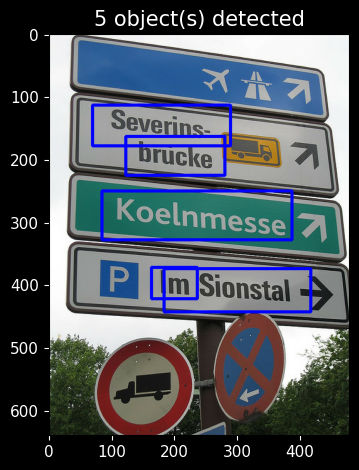

In [2]:
from models.detection import detect

_ = detect('text.jpg', save = False, model = 'east', verbose = 1, color = 'b', merge_threshold = 0.3, nms_threshold = 0.2)

### Non-Maximal Suppression (NMS) vs Locality-Aware NMS

The `EAST` model behaves like a segmentation model, meaning that it predicts a value (confidence score + text box position / orientation) for each pixel of the image. However, multiple pixels belong to the same text box : it is therefore necessary to filter out duplicated boxes. For this purpose, the standard NMS algorithm filters out all boxes that have an Intersection over Union (IoU) with a reference box higher than `nms_threshold` (typically 0.2). This is performed sequentially, so that only 1 box (the *reference* one) is kept for each text. However, the selected one does not always cover all the region (especially if the region is large), or may not be the best one. For this purpose, the `EAST` authors have defined a custom algorithm : the Locality aware NMS (LANMS). This method merges the overlapping boxes so that the resulting box covers the maximal area of all the overlapping boxes at this position. 

This cell illustrates a step-by-step NMS filtering of the `EAST` output, with a comparison of NMS and LANMS filtering strategies. In the `detect` method, the strategy can be modified though the `nms_method` argument.

{'boxes': (829, 4), 'scores': (829,), 'format': ()}
(5, 4)
(5, 4)


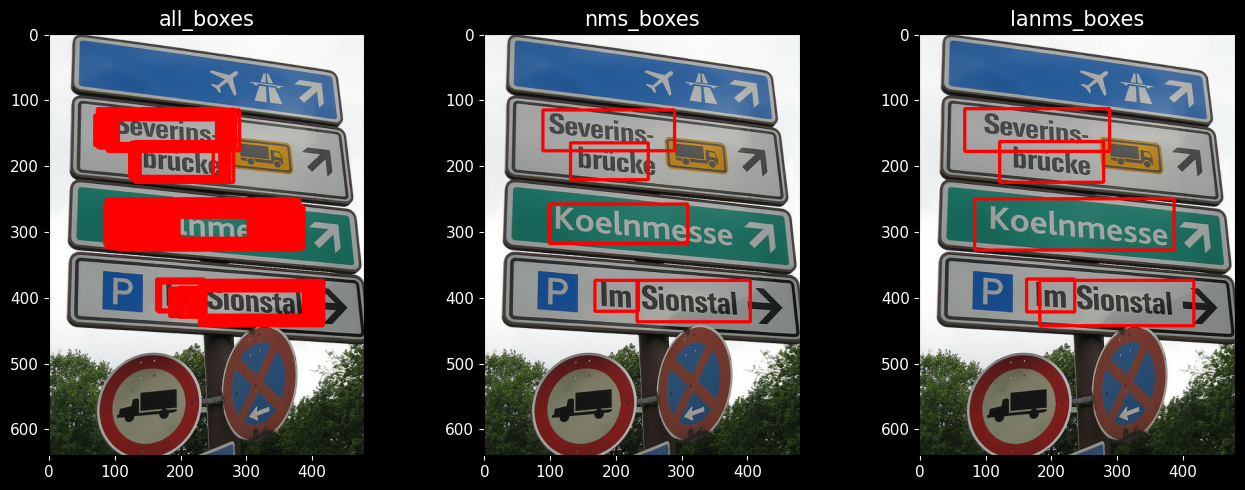

In [4]:
import keras
import numpy as np

from utils import *
from utils.image import *
from models import get_pretrained

model = get_pretrained('east')

inp = model.get_input('text.jpg')

out = model(inp[None], training = False)

boxes = model.decode_output(out, nms_threshold = 1., inputs = inp[None])[0]
boxes = convert_box_format(boxes, 'xyxy')
all_boxes = boxes
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), boxes))

nms_boxes = nms(boxes, method = 'tensorflow', nms_threshold = 0.2)
nms_boxes = nms_boxes[0][0][nms_boxes[2][0]]
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), nms_boxes))

lanms_boxes = nms(boxes['boxes'], method = 'lanms', merge_threshold = 0.3, nms_threshold = .2, run_eagerly = True, source = 'xyxy')
lanms_boxes = lanms_boxes[0][0][lanms_boxes[2][0]]
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), lanms_boxes))

plot_multiple(
    all_boxes   = draw_boxes('text.jpg', boxes, color = 'r', source = 'xyxy'),
    nms_boxes   = draw_boxes('text.jpg', nms_boxes, color = 'r', source = 'xyxy'),
    lanms_boxes = draw_boxes('text.jpg', lanms_boxes, color = 'r', source = 'xyxy'),
    plot_type = 'imshow', ncols = 3
)
#plot(draw_boxes('../detection/text.jpg', boxes, source = 'xyxy', color = 'b'), figsize = (10, 10))
#show_boxes('../detection/text.jpg', boxes, source = 'xyxy')